<a href="https://colab.research.google.com/github/nannthd/project_AIEngineer/blob/main/license_plate_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
!pip install pytube opencv-python-headless

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

#Data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AWtZRbYK04sFZNNZ1t4X")
project = rf.workspace("projectaiengineer").project("license-plates-gpj5f")
version = project.version(2)
dataset = version.download("yolov8")

In [ ]:
%cat {dataset.location}/data.yaml

In [8]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
%cat {dataset.location}/data.yaml

# Load a model

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load a model
model = YOLO("/content/drive/MyDrive/license plate/best.pt")

In [12]:
model.names

{0: 'number', 1: 'province'}

In [13]:
image_test = '/content/-license-plates-2/test/images'

In [ ]:
pred = model.predict(image_test, save=True, save_txt=True)
pred

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory = '/content/runs/detect/predict'

# ตรวจสอบว่าไดเรกทอรีนี้มีไฟล์ภาพหรือไม่
if os.path.isdir(directory):
    # หากมีไฟล์ภาพในไดเรกทอรี
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # แสดงภาพทีละภาพ
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = mpimg.imread(image_path)

        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')  # ปิดแกน X และ Y
        plt.show()
else:
    print("ไม่พบไดเรกทอรีที่ระบุ")

#EasyOCR

In [ ]:
!pip install ultralytics

In [ ]:
!pip install easyocr

In [3]:
!pip install opencv-python-headless

##1


0: 640x640 1 number, 1 province, 563.3ms
Speed: 12.9ms preprocess, 563.3ms inference, 39.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

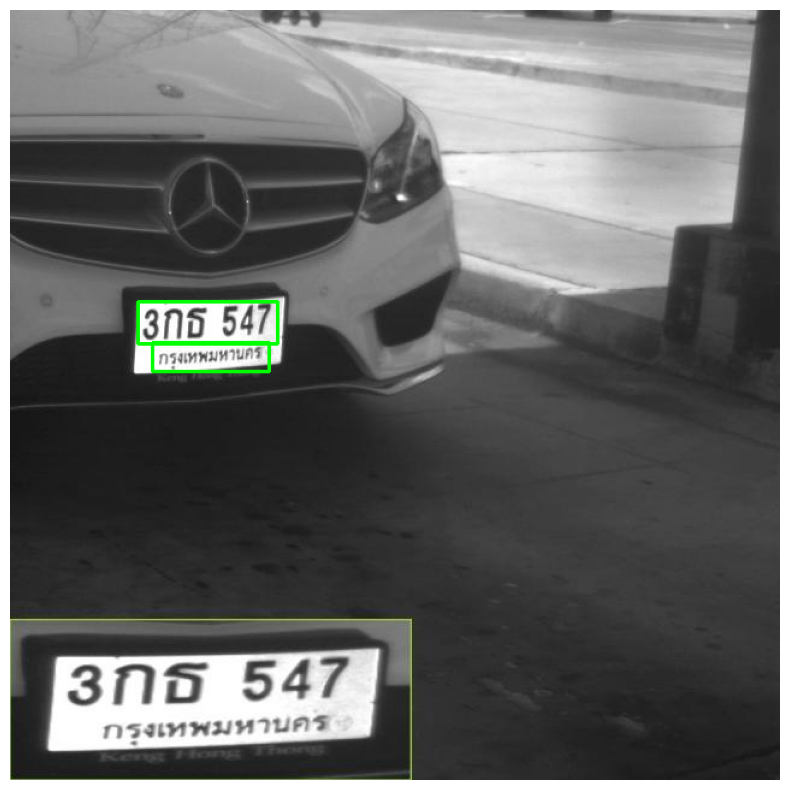

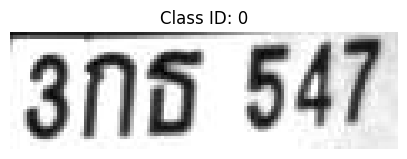

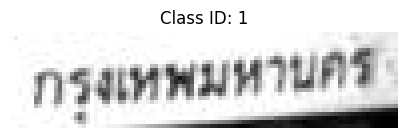

Detected Texts - Number:
3กธ 547

Detected Texts - Province:
กรุงเทพมหานคร


In [4]:
# Step 1: Install YOLOv8, EasyOCR, and OpenCV
# !pip install ultralytics
# !pip install easyocr
# !pip install opencv-python-headless

# Step 2: Import Required Libraries
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import easyocr

# Step 3: Load the YOLOv8 Model with Custom Weights
model = YOLO('/content/drive/MyDrive/license plate/best.pt')  # Replace with the path to your weights file

# Step 4: Load the Input Image
input_image_path = '/content/drive/MyDrive/license plate/1.jpg'  # Replace with the path to your input image
image = cv2.imread(input_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Step 5: Perform Inference
results = model.predict(image_rgb, save=True)

# Step 6: Initialize EasyOCR Reader for Thai Language
reader = easyocr.Reader(['th'])  # Specify 'th' for Thai language

# Step 7: Process Each Detection and Apply EasyOCR
output_image = image_rgb.copy()
detected_texts = {'text_number': [], 'text_province': []}  # Dictionary to store texts by category
cropped_images = []

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Access the bounding box coordinates
        class_id = int(box.cls)  # Access the class ID

        # Draw bounding box
        cv2.rectangle(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Extract the detected region and convert to grayscale
        detected_region = cv2.cvtColor(image_rgb[y1:y2, x1:x2], cv2.COLOR_RGB2GRAY)
        cropped_images.append((class_id, detected_region))

        # Apply EasyOCR to the grayscale region
        ocr_result = reader.readtext(detected_region)

        # Collect OCR result and categorize by class
        for (bbox, text, prob) in ocr_result:
            if class_id == 0:
                detected_texts['text_number'].append(text)
            elif class_id == 1:
                detected_texts['text_province'].append(text)

# Step 8: Display the Output Image with Bounding Boxes
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()

# Step 9: Display Cropped Images of Each Class
for idx, (class_id, cropped_image) in enumerate(cropped_images):
    plt.figure(figsize=(5, 5))
    plt.title(f'Class ID: {class_id}')
    plt.imshow(cropped_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Step 10: Print the OCR Results
print("Detected Texts - Number:")
for text in detected_texts['text_number']:
    print(text)

print("\nDetected Texts - Province:")
for text in detected_texts['text_province']:
    print(text)

##2


0: 640x640 1 number, 1 province, 395.8ms
Speed: 2.8ms preprocess, 395.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


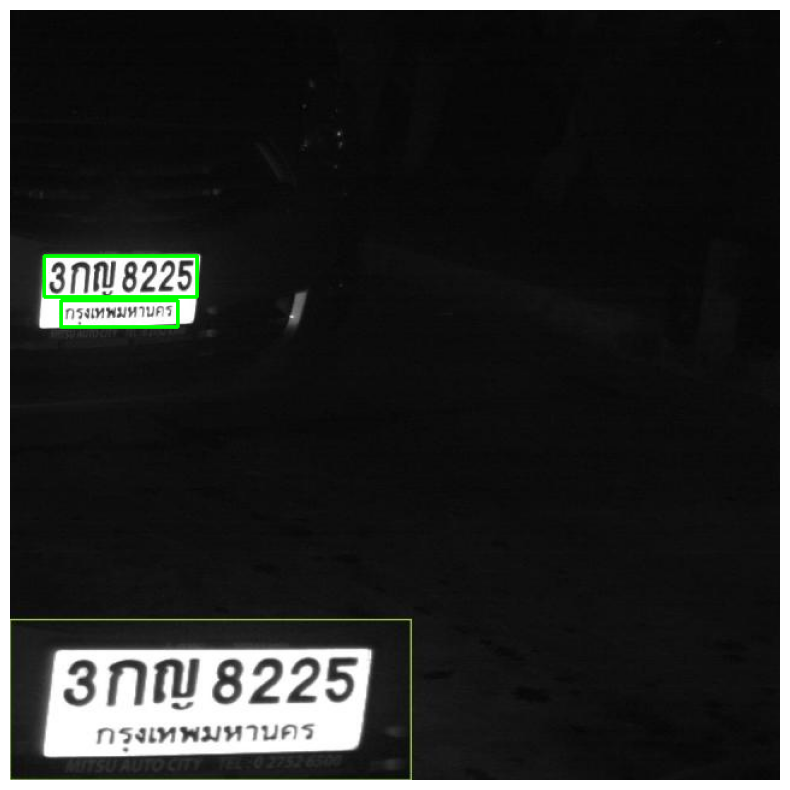

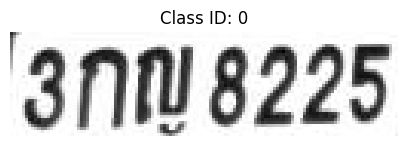

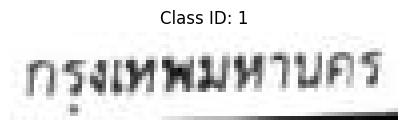

Detected Texts - Number:
3กญ8225

Detected Texts - Province:
กรุงเทพมหานคร


In [5]:
# Step 1: Install YOLOv8, EasyOCR, and OpenCV
# !pip install ultralytics
# !pip install easyocr
# !pip install opencv-python-headless

# Step 2: Import Required Libraries
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import easyocr
import numpy as np

# Step 3: Load the YOLOv8 Model with Custom Weights
model = YOLO('/content/drive/MyDrive/license plate/best.pt')  # Replace with the path to your weights file

# Step 4: Load the Input Image
input_image_path = '/content/drive/MyDrive/license plate/2.jpg'  # Replace with the path to your input image
image = cv2.imread(input_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Step 5: Perform Inference
results = model.predict(image_rgb)

# Step 6: Initialize EasyOCR Reader for Thai Language
reader = easyocr.Reader(['th'])  # Specify 'th' for Thai language

# Step 7: Process Each Detection and Apply EasyOCR
output_image = image_rgb.copy()
detected_texts = {'text_number': [], 'text_province': []}  # Dictionary to store texts by category
cropped_images = []

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Access the bounding box coordinates
        class_id = int(box.cls)  # Access the class ID

        # Draw bounding box
        cv2.rectangle(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Extract the detected region and convert to grayscale
        detected_region = cv2.cvtColor(image_rgb[y1:y2, x1:x2], cv2.COLOR_RGB2GRAY)
        cropped_images.append((class_id, detected_region))

        # Apply EasyOCR to the grayscale region
        ocr_result = reader.readtext(detected_region)

        # Collect OCR result and categorize by class
        for (bbox, text, prob) in ocr_result:
            if class_id == 0:
                detected_texts['text_number'].append(text)
            elif class_id == 1:
                detected_texts['text_province'].append(text)

# Step 8: Display the Output Image with Bounding Boxes
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()

# Step 9: Display Cropped Images of Each Class
for idx, (class_id, cropped_image) in enumerate(cropped_images):
    plt.figure(figsize=(5, 5))
    plt.title(f'Class ID: {class_id}')
    plt.imshow(cropped_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Step 10: Print the OCR Results
print("Detected Texts - Number:")
for text in detected_texts['text_number']:
    print(text)

print("\nDetected Texts - Province:")
for text in detected_texts['text_province']:
    print(text)